# Medical Data Analysis

In this project, we will visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas. The dataset values are from <a>freecodecamp.org</a> 

## Data description

The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. You will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

Feature | Variable Type | Variable | Value Type 
----|----|----|----
Age | Objective Feature | age | int (days)
Height | Objective Feature | height | int (cm)
Weight | Objective Feature | weight | float (kg)
Gender | Objective Feature | gender | categorical code
Systolic blood pressure | Examination Feature | ap_hi | int
Diastolic blood pressure | Examination Feature | ap_lo | int
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal
Smoking | Subjective Feature | smoke | binary
Alcohol intake | Subjective Feature | alco | binary
Physical activity | Subjective Feature | active | binary
Presence or absence of cardiovascular disease | Target Variable | cardio | binary

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('medical_examination.csv')

In [3]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


## Overweight or not ?

We wille add an overweight column to the data. To determine if a person is overweight, first we calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Then we'll use the value 0 for NOT overweight and the value 1 for overweight.

In [4]:
BMI = df['weight']/(df['height']*0.01*df['height']*0.01)
BMI

0        21.967120
1        34.927679
2        23.507805
3        28.710479
4        23.011177
           ...    
69995    26.927438
69996    50.472681
69997    31.353579
69998    27.099251
69999    24.913495
Length: 70000, dtype: float64

In [5]:
df['overweight'] = np.where(BMI > 25, 1, 0)

In [6]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


## Data normalization

We'll normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, we'll make the value 0. If the value is more than 1, we'll make the value 1.

In [7]:
df['cholesterol']

0        1
1        3
2        3
3        1
4        1
        ..
69995    1
69996    2
69997    3
69998    1
69999    2
Name: cholesterol, Length: 70000, dtype: int64

In [8]:
df.loc[df['cholesterol'] == 1, 'cholesterol'] = 0
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,2,0,0,0,1,1


In [9]:
df.loc[df['cholesterol'] > 1, 'cholesterol'] = 1
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,2,0,0,0,1,1


In [10]:
df.loc[df['gluc'] == 1, 'gluc'] = 0
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,2,0,0,0,1,1


In [11]:
df.loc[df['gluc'] > 1, 'gluc'] = 1
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


## Comparing the examination and subjective features for the people who have cardiovascular disease and those who don't



In [12]:
df_cat = pd.melt(df, id_vars = ['cardio'], value_vars= ['cholesterol', 'gluc', 'smoke', 'alco', 'active','overweight'])
df_cat

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [13]:
df_cat['total'] = 1
df_cat

,cardio,variable,value,total
0,0,cholesterol,0,1
1,1,cholesterol,1,1
2,1,cholesterol,1,1
3,1,cholesterol,0,1
4,0,cholesterol,0,1
...,...,...,...,...
419995,0,overweight,1,1
419996,1,overweight,1,1
419997,1,overweight,1,1
419998,1,overweight,1,1


In [14]:
df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index = False).count()

In [15]:
df_cat

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
...,...,...,...,...
19,1,gluc,1,6394
20,1,overweight,0,10539
21,1,overweight,1,24440
22,1,smoke,0,32050


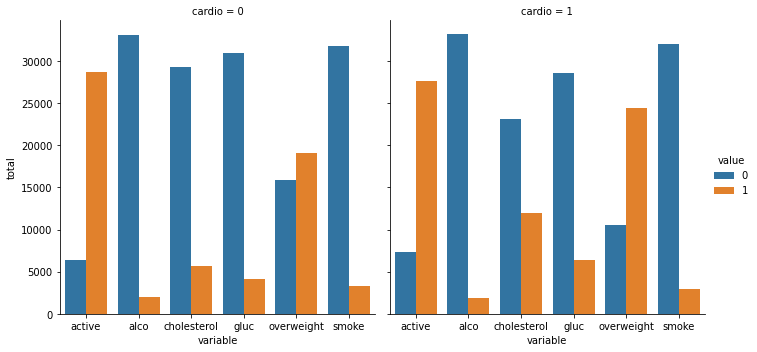

In [16]:
fig = sns.catplot(x= 'variable', y='total', data= df_cat, hue='value', kind='bar', col='cardio').fig

## Data cleaning

We'll filter out the following patient segments that represent incorrect data: <br>
- diastolic pressure is higher than systolic
- height is less than the 2.5th percentile 
- height is more than the 97.5th percentile
- weight is less than the 2.5th percentile
- weight is more than the 97.5th percentile


In [17]:
df_heat = df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]
df_heat

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


## Correlation matrix

In [18]:
corr = df_heat.corr(method='pearson')
corr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
gender,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274
alco,-0.000708,-0.026970,0.168637,0.089785,0.059917,0.000769,0.033042,0.038446,0.014297,0.341200,1.000000,0.025847,-0.011088,0.025056
active,0.005891,-0.011445,0.007864,-0.005661,-0.014430,-0.000222,0.001569,0.002494,-0.010145,0.026940,0.025847,1.000000,-0.037339,-0.003387
cardio,0.003900,0.240241,0.002320,-0.024102,0.170042,0.050556,0.327181,0.203467,0.088445,-0.020345,-0.011088,-0.037339,1.000000,0.143168


<AxesSubplot:>

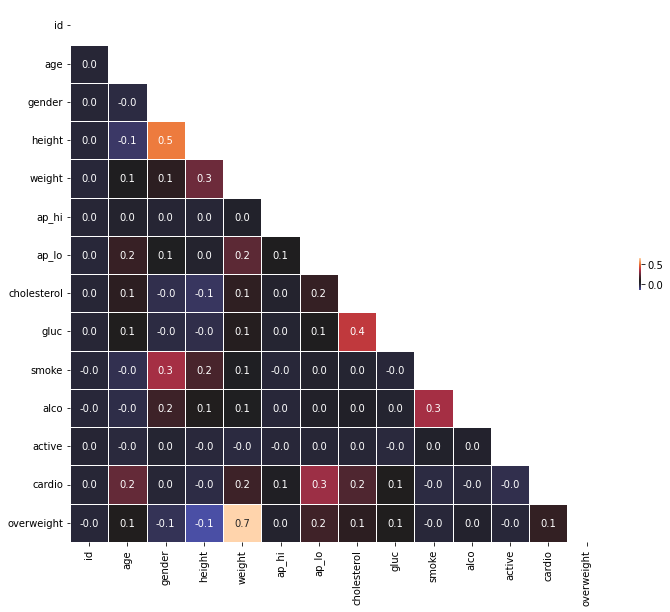

In [19]:
mask = np.triu(corr)
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, linewidths=1, square=True, annot= True, mask= mask, fmt=".1f", center= 0.08, cbar_kws={"shrink": 0.05})
